# Titanic - Machine Learning from Disaster 

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# metrics and plots imports
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree

# unsupervised and matrix/feature decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# ml models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# dl models
from sklearn.neural_network import MLPClassifier

In [1]:
def s():
    print("="*50)

def ts():
    t_start = time.time()
    print("Time started...")
    s()
    s()
    return t_start

t_total = 0
def te(t1):
    t_end = time.time()
    t_time = t_end - t1
    s()
    s()
    global t_total
    t_total = t_total + t_time
    print("Time taken:",round(t_time, 4),"seconds.")
    s()
    print("Total Time:",round(t_total, 2),"seconds.")

# Load

In [3]:
df0 = pd.read_csv('train.csv')
df = df0.copy()

In [4]:
df0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


1. if it's a "1", the passenger survived, if it's a "0", the passenger died.

2. pclass: A proxy for socio-economic status (SES)
1st = Upper,
2nd = Middle,
3rd = Lower,
where, 1 = 1st, 2 = 2nd, 3 = 3rd

3. age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

4. sibsp: # of siblings or spouses aboard the Titanic.

5. parch: # of parents or children aboard the Titanic. 

6. embarked: Port of Embarkation,where C = Cherbourg, Q = Queenstown, S = Southampton



# Viz

In [9]:
sns.set_theme()

<AxesSubplot:xlabel='Survived', ylabel='count'>

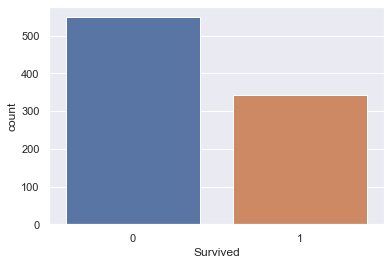

In [10]:
sns.countplot(x='Survived' , data= df)
# 0 is dead, 1 is survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

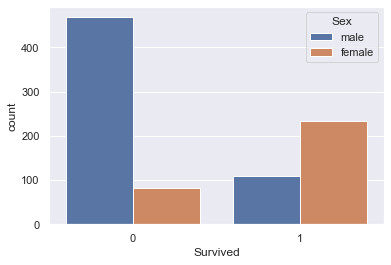

In [11]:
sns.countplot(x='Survived', hue='Sex' , data= df)
# in legends 0 is female, 1 is male

<AxesSubplot:xlabel='Pclass', ylabel='count'>

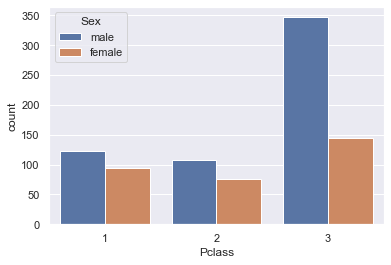

In [12]:
sns.countplot(x='Pclass', hue='Sex' , data= df)
# in legends 0 is female, 1 is male

<AxesSubplot:xlabel='Age', ylabel='Fare'>

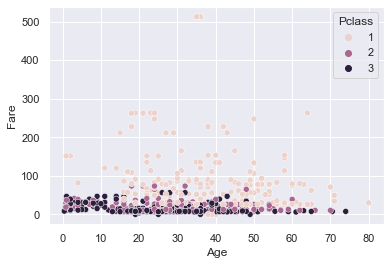

In [13]:
sns.scatterplot(data=df, x='Age', y='Fare' ,hue='Pclass')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

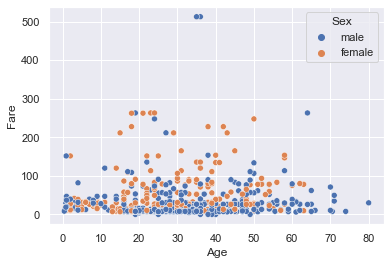

In [14]:
sns.scatterplot(data=df, x='Age', y='Fare' ,hue='Sex')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

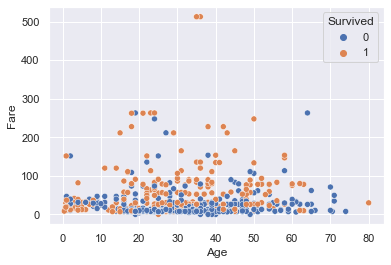

In [15]:
sns.scatterplot(data=df, x='Age', y='Fare' ,hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

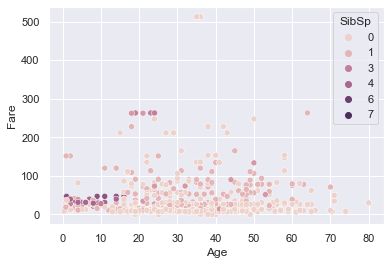

In [16]:
sns.scatterplot(data=df, x='Age', y='Fare' ,hue='SibSp')

<AxesSubplot:xlabel='Age', ylabel='SibSp'>

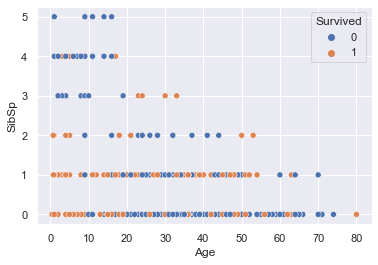

In [17]:
sns.scatterplot(data=df, x='Age', y='SibSp' ,hue='Survived')

<AxesSubplot:xlabel='Age'>

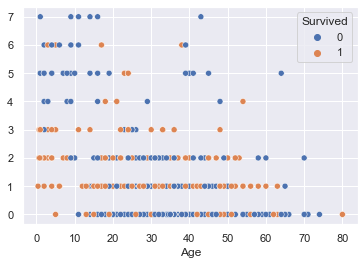

In [18]:
sns.scatterplot(data=df, x='Age', y=df['SibSp']+df['Parch'] ,hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Parch'>

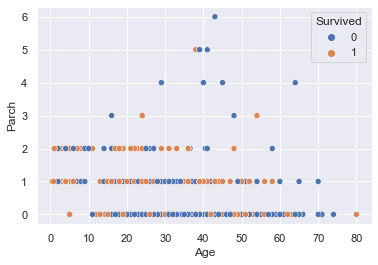

In [19]:
sns.scatterplot(data=df, x='Age', y='Parch' ,hue='Survived')

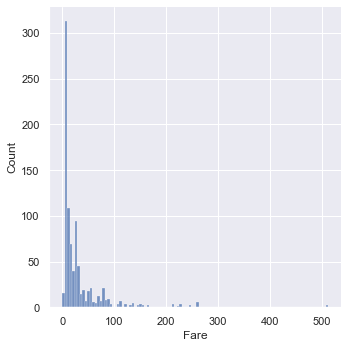

In [20]:
sns.displot(data=df, x="Fare")

<AxesSubplot:xlabel='Age'>

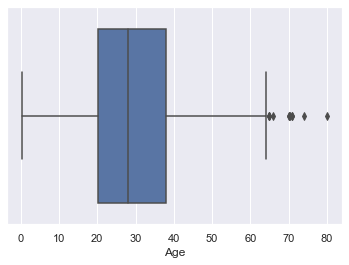

In [21]:
sns.boxplot(data=df, x='Age' ,hue='Pclass' )

<AxesSubplot:xlabel='Age', ylabel='Survived'>

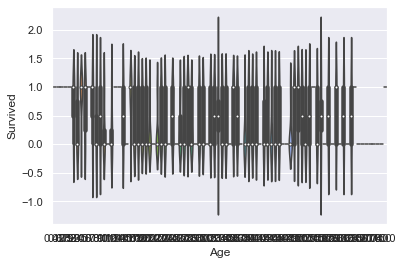

In [22]:
sns.violinplot(data=df , x="Age" , y= "Survived")

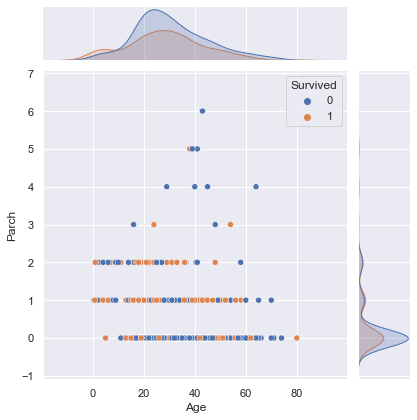

In [23]:
sns.jointplot(data = df , x='Age', y='Parch' ,hue='Survived')

# Pre-Process 

In [24]:
# if it's a "1", the passenger survived, if it's a "0", the passenger died.

df['Survived'].value_counts()

# Number of 'death' are more than Number of 'Survived'

0    549
1    342
Name: Survived, dtype: int64

In [25]:
#1 = 1st, 2 = 2nd, 3 = 3rd
#1st = Upper, 2nd = Middle, 3rd = Lower

df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [26]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
df.Sex[df.Sex == 'male'] = 1
df.Sex[df.Sex == 'female'] = 0

# from sklearn.preprocessing import LabelEncoder
# le1 = LabelEncoder()
# titanic_data['Sex'] = le1.fit_transform(titanic_data['Sex'])

<ipython-input-27-9b089c97e6c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex[df.Sex == 'male'] = 1
<ipython-input-27-9b089c97e6c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex[df.Sex == 'female'] = 0


In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [29]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df['Age'].isna().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [31]:
df = df.drop("Cabin", axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [32]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,NaN


In [33]:
df[df['Fare'] == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,NaN


In [34]:
df[df['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,NaN


In [35]:
df[60:70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
60,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,C
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0000,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",1,45.0,1,0,36973,83.4750,S
63,64,0,3,"Skoog, Master. Harald",1,4.0,3,2,347088,27.9000,S
64,65,0,1,"Stewart, Mr. Albert A",1,NaN,0,0,PC 17605,27.7208,C
65,66,1,3,"Moubarek, Master. Gerios",1,NaN,1,1,2661,15.2458,C
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",0,29.0,0,0,C.A. 29395,10.5000,S
67,68,0,3,"Crease, Mr. Ernest James",1,19.0,0,0,S.P. 3464,8.1583,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",0,17.0,4,2,3101281,7.9250,S
69,70,0,3,"Kink, Mr. Vincenz",1,26.0,2,0,315151,8.6625,S


In [36]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
#df['Embarked'].fillna(value= 'S')

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [38]:
df['Embarked'].isna().value_counts()

False    891
Name: Embarked, dtype: int64

In [39]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [40]:
# int(df['Age'].mean())
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [41]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [42]:
print(df['Age'])
# Some age value is in fraction

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


In [43]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C


In [44]:
#https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/
df['Family_Size']=df['SibSp']+df['Parch']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C,0


In [45]:
#This is an interaction term, since age and class are both numbers we can just multiply them.
df['Age_mul_Class']=df['Age']*df['Pclass']


In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Age_mul_Class
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S,1,66.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C,1,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,78.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S,1,35.000000
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S,0,105.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S,0,54.000000
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S,0,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,S,3,89.097353
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C,0,26.000000


In [47]:
#Here we divide the fare by the number of family members traveling together,\ 
# I’m not exactly sure what this represents, but it’s easy enough to add in.

df['Fare_div_Family_size']=df['Fare']/(df['Family_Size']+1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Age_mul_Class,Fare_div_Family_size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S,1,66.000000,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C,1,38.000000,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,78.000000,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S,1,35.000000,26.55000
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S,0,105.000000,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S,0,54.000000,13.00000
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S,0,19.000000,30.00000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,S,3,89.097353,5.86250
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C,0,26.000000,30.00000


In [48]:
# s = df['Embarked']
# s.reshape(1,-1)

df = pd.get_dummies(df, columns = ['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Family_Size,Age_mul_Class,Fare_div_Family_size,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,1,66.000000,3.62500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1,38.000000,35.64165,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0,78.000000,7.92500,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,1,35.000000,26.55000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0,105.000000,8.05000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0,54.000000,13.00000,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,0,19.000000,30.00000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,3,89.097353,5.86250,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0,26.000000,30.00000,1,0,0


In [49]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Family_Size',
 'Age_mul_Class',
 'Fare_div_Family_size',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [50]:
df= df.drop(['Name','Ticket','PassengerId'], axis =1)

In [51]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family_Size,Age_mul_Class,Fare_div_Family_size,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,1,66.000000,3.62500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,38.000000,35.64165,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,78.000000,7.92500,0,0,1
3,1,1,0,35.000000,1,0,53.1000,1,35.000000,26.55000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,105.000000,8.05000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,54.000000,13.00000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,19.000000,30.00000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,3,89.097353,5.86250,0,0,1
889,1,1,1,26.000000,0,0,30.0000,0,26.000000,30.00000,1,0,0


In [52]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Age_mul_Class,Fare_div_Family_size,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,64.966817,19.916375,0.188552,0.086420,0.725028
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459,32.947541,35.841257,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.920000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,40.000000,7.250000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,63.000000,8.300000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,89.097353,23.666667,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,222.000000,512.329200,1.000000,1.000000,1.000000


# Split & Standardize

In [53]:
X = df.drop("Survived", axis= 1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Family_Size,Age_mul_Class,Fare_div_Family_size,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,1,66.000000,3.62500,0,0,1
1,1,0,38.000000,1,0,71.2833,1,38.000000,35.64165,1,0,0
2,3,0,26.000000,0,0,7.9250,0,78.000000,7.92500,0,0,1
3,1,0,35.000000,1,0,53.1000,1,35.000000,26.55000,0,0,1
4,3,1,35.000000,0,0,8.0500,0,105.000000,8.05000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,54.000000,13.00000,0,0,1
887,1,0,19.000000,0,0,30.0000,0,19.000000,30.00000,0,0,1
888,3,0,29.699118,1,2,23.4500,3,89.097353,5.86250,0,0,1
889,1,1,26.000000,0,0,30.0000,0,26.000000,30.00000,1,0,0


In [54]:
feat_names = X.columns
feat_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size',
       'Age_mul_Class', 'Fare_div_Family_size', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [55]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [57]:
print("X_train.shape = ", X_train.shape, "and y_train.shape = ",y_train.shape)
print("X_test.shape = ", X_test.shape, "and y_test.shape = ",y_test.shape)

X_train.shape =  (712, 12) and y_train.shape =  (712,)
X_test.shape =  (179, 12) and y_test.shape =  (179,)


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
print("X_train.shape = ", X_train.shape, "and X_test.shape = ",X_test.shape)

X_train.shape =  (712, 12) and X_test.shape =  (179, 12)


In [60]:
X_train[0]

array([-1.61413602,  0.7243102 ,  1.22920747, -0.47072241, -0.47934164,
       -0.07868358, -0.55466613, -0.59819881,  0.21938202, -0.46146201,
       -0.30335547,  0.59248936])

# Pre Processing and Standardize Test set

In [61]:
# Pre Processing Test set
df_test0 = pd.read_csv('test.csv')
df_test = df_test0.copy()
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [62]:
df_test = df_test.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)

df_test['Age'].fillna(df['Age'].mean(), inplace=True)
df_test['Fare'].fillna(df['Fare'].mean(), inplace=True)

df_test['Age_mul_Class']=df_test['Age']*df_test['Pclass']
df_test['Family_Size']=df_test['SibSp']+df_test['Parch']
df_test['Fare_div_Family_size']=df_test['Fare']/(df_test['Family_Size']+1)

df_test = pd.get_dummies(df_test, columns = ['Embarked'])


In [63]:
df_test.Sex[df_test.Sex == 'male'] = 1
df_test.Sex[df_test.Sex == 'female'] = 0

<ipython-input-63-b4eb15ed0de2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.Sex[df_test.Sex == 'male'] = 1
<ipython-input-63-b4eb15ed0de2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.Sex[df_test.Sex == 'female'] = 0


In [64]:
df_test.isna().sum()

Pclass                  0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Fare                    0
Age_mul_Class           0
Family_Size             0
Fare_div_Family_size    0
Embarked_C              0
Embarked_Q              0
Embarked_S              0
dtype: int64

In [65]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Age_mul_Class,Family_Size,Fare_div_Family_size,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.500000,0,0,7.8292,103.500000,0,7.829200,0,1,0
1,3,0,47.000000,1,0,7.0000,141.000000,1,3.500000,0,0,1
2,2,1,62.000000,0,0,9.6875,124.000000,0,9.687500,0,1,0
3,3,1,27.000000,0,0,8.6625,81.000000,0,8.662500,0,0,1
4,3,0,22.000000,1,1,12.2875,66.000000,2,4.095833,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,29.699118,0,0,8.0500,89.097353,0,8.050000,0,0,1
414,1,0,39.000000,0,0,108.9000,39.000000,0,108.900000,1,0,0
415,3,1,38.500000,0,0,7.2500,115.500000,0,7.250000,0,0,1
416,3,1,29.699118,0,0,8.0500,89.097353,0,8.050000,0,0,1


In [66]:
df_test.describe()

,Pclass,Age,SibSp,Parch,Fare,Age_mul_Class,Family_Size,Fare_div_Family_size,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.154603,0.447368,0.392344,35.619000,63.584624,0.839713,21.829042,0.244019,0.110048,0.645933
std,0.841838,12.636666,0.896760,0.981429,55.840751,28.699720,1.519072,35.600641,0.430019,0.313324,0.478803
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.510000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,43.125000,0.000000,7.634400,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,60.500000,0.000000,8.662500,0.000000,0.000000,1.000000
75%,3.000000,35.750000,1.000000,0.000000,31.500000,89.097353,1.000000,26.000000,0.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,181.500000,10.000000,262.375000,1.000000,1.000000,1.000000


In [67]:
df_test = scaler.transform(df_test)

In [68]:
df_test.shape

(418, 12)

In [69]:
df_test[0]

array([ 0.81303367,  0.7243102 ,  0.38210353, -0.47072241, -0.47934164,
       -0.47671165, 61.00325058, -1.96603117, -0.32248411, -0.46146201,
        3.29646275, -1.68779402])

# Models 

# Unsupervised and dim reduction

## 1.PCA

In [70]:
from sklearn.decomposition import PCA

In [71]:
t=ts()

pca = PCA()
pca.n_components = 2
pca_data = pca.fit_transform(X_train)

print(pca_data)
print(pca_data.shape)

te(t)

Time started...
[[-0.22585399  1.22778543]
 [-0.58576966  0.15677816]
 [-1.72151909 -0.20280577]
 ...
 [-1.15994154 -1.23941276]
 [ 3.51504789 -0.87334185]
 [ 1.48013261  0.44728895]]
(712, 2)
Time taken: 0.005 seconds.
Total Time: 0.0 seconds.


In [72]:
print(pca.components_)
print(pca.components_.shape)
s()
print(pca.explained_variance_)
s()
print(pca.explained_variance_ratio_)
s()
print(pca.singular_values_)
s()

[[-0.29763921 -0.2217519  -0.15324105  0.3051921   0.32880665  0.43969274
   0.36809868 -0.38834606  0.31295503  0.19535297 -0.10658084 -0.10196094]
 [-0.33223646  0.02473776  0.25160024 -0.39257467 -0.32998369  0.25342456
  -0.42974949 -0.03661213  0.38312683  0.30467296  0.00858647 -0.269751  ]]
(2, 12)
[2.96458056 2.68914855]
[0.2467014  0.22378097]
[45.91096575 43.72624634]


In [73]:
pca_data = np.vstack((pca_data.T, y_train)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "survived"))
print(pca_df)

     1st_principal  2nd_principal  survived
0        -0.225854       1.227785       0.0
1        -0.585770       0.156778       0.0
2        -1.721519      -0.202806       0.0
3        -0.995427      -0.929286       0.0
4         3.315307      -4.297157       0.0
..             ...            ...       ...
707      -0.744259      -0.435791       1.0
708       0.186757       0.976333       0.0
709      -1.159942      -1.239413       0.0
710       3.515048      -0.873342       1.0
711       1.480133       0.447289       0.0

[712 rows x 3 columns]


<AxesSubplot:xlabel='1st_principal', ylabel='2nd_principal'>

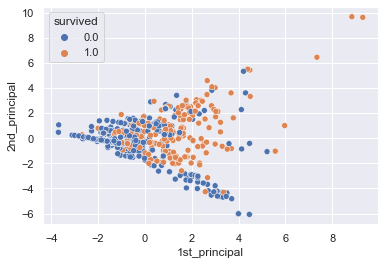

In [74]:
sns.scatterplot(x="1st_principal",y="2nd_principal",hue="survived",data=pca_df)

In [75]:
t=ts()

pca.n_components = 12
pca_data = pca.fit_transform(X_train)
print(pca_data.shape)

te(t)

Time started...
(712, 12)
Time taken: 0.001 seconds.
Total Time: 0.01 seconds.


[2.46701402e-01 2.23780971e-01 1.46662301e-01 1.10201905e-01
 8.45803072e-02 7.53365722e-02 5.82471707e-02 4.34564218e-02
 7.83695661e-03 3.19599257e-03 1.41783673e-32 9.89221594e-33]
(12,)
[0.2467014  0.47048237 0.61714467 0.72734658 0.81192689 0.88726346
 0.94551063 0.98896705 0.99680401 1.         1.         1.        ]
(12,)


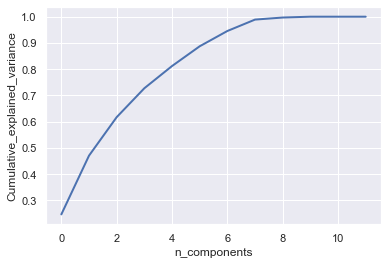

In [76]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
print(percentage_var_explained)
print(percentage_var_explained.shape)
s()
cum_var_explained = np.cumsum(percentage_var_explained)
print(cum_var_explained)
print(cum_var_explained.shape)

plt.grid()
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

## 2.TSNE

In [77]:
from sklearn.manifold import TSNE

In [78]:
t=ts()

tsne_model = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = tsne_model.fit_transform(X_train)
print(tsne_data)
print(tsne_data.shape)

te(t)

Time started...
[[ -6.068687  -16.669373 ]
 [-16.134575   -6.9248734]
 [-17.704693   20.907436 ]
 ...
 [-16.859346   10.960875 ]
 [  1.836932   -6.440157 ]
 [ -7.4226513 -11.373381 ]]
(712, 2)
Time taken: 2.7901 seconds.
Total Time: 2.8 seconds.


In [79]:
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "survived"))
print(tsne_df)

         Dim_1      Dim_2  survived
0    -6.068687 -16.669373       0.0
1   -16.134575  -6.924873       0.0
2   -17.704693  20.907436       0.0
3   -20.113724  10.750182       0.0
4     4.036902  10.227408       0.0
..         ...        ...       ...
707  16.108530   0.488403       1.0
708  -8.408680 -13.838287       0.0
709 -16.859346  10.960875       0.0
710   1.836932  -6.440157       1.0
711  -7.422651 -11.373381       0.0

[712 rows x 3 columns]


<AxesSubplot:xlabel='Dim_1', ylabel='Dim_2'>

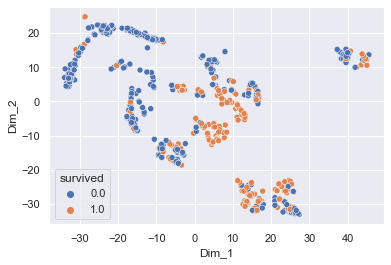

In [80]:
sns.scatterplot(x="Dim_1",y="Dim_2",hue="survived",data=tsne_df)

## 3.K-Means

In [81]:
from sklearn.cluster import KMeans

In [82]:
t=ts()

kmeans = KMeans(n_clusters=2)
kme = kmeans.fit_transform(X_train)
print(kme.shape)

te(t)

Time started...
(712, 2)
Time taken: 0.0309 seconds.
Total Time: 2.83 seconds.


In [83]:
kme_data = np.vstack((kme.T, y_train)).T
kme_df = pd.DataFrame(data=kme_data, columns=("C_1", "C_2", "survived"))
print(kme_df)

          C_1       C_2  survived
0    2.601552  3.501766       0.0
1    1.601309  3.153472       0.0
2    1.130840  3.946879       0.0
3    1.346301  3.382475       0.0
4    6.214422  4.479673       0.0
..        ...       ...       ...
707  2.066524  3.494379       1.0
708  2.622167  3.145281       0.0
709  2.592475  4.159368       0.0
710  5.067176  2.725764       1.0
711  3.387694  2.553380       0.0

[712 rows x 3 columns]


<AxesSubplot:xlabel='C_1', ylabel='C_2'>

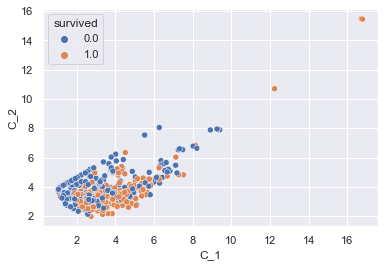

In [84]:
sns.scatterplot(x="C_1",y="C_2",hue="survived",data=kme_df)

# 4.Agglomerative

In [85]:
from sklearn.cluster import AgglomerativeClustering

In [86]:
t=ts()

agmc = AgglomerativeClustering(n_clusters=2)
agc = agmc.fit_predict(X_train)
print(agc.shape)

te(t)

Time started...
(712,)
Time taken: 0.014 seconds.
Total Time: 2.84 seconds.


<AxesSubplot:>

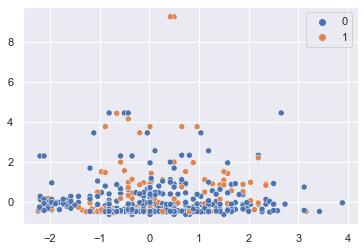

In [87]:
sns.scatterplot(x=X_train[:,2], y=X_train[:,5], hue=agc) 

## 5.DBSCAN

In [88]:
from sklearn.cluster import DBSCAN

In [89]:
t=ts()

dbsc = DBSCAN()
dbs = dbsc.fit_predict(X_train)
print(dbs.shape)

te(t)

Time started...
(712,)
Time taken: 0.016 seconds.
Total Time: 2.86 seconds.


In [90]:
set(dbs)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

<AxesSubplot:>

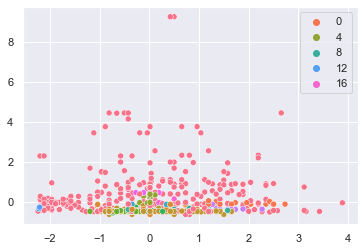

In [91]:
sns.scatterplot(x=X_train[:,2], y=X_train[:,5], hue=dbs, palette='husl') 

## 6.SVD

In [92]:
from sklearn.decomposition import TruncatedSVD

In [93]:
t=ts()

tsvd = TruncatedSVD()
svd = tsvd.fit_transform(X_train)
print(svd.shape)
print('done...')

te(t)

Time started...
(712, 2)
done...
Time taken: 0.004 seconds.
Total Time: 2.86 seconds.


In [94]:
svd_data = np.vstack((svd.T, y_train)).T
svd_df = pd.DataFrame(data=svd_data, columns=("C_1", "C_2", "survived"))
print(svd_df)

          C_1       C_2  survived
0   -0.225854  1.227785       0.0
1   -0.585770  0.156778       0.0
2   -1.721519 -0.202806       0.0
3   -0.995427 -0.929286       0.0
4    3.315307 -4.297157       0.0
..        ...       ...       ...
707 -0.744259 -0.435791       1.0
708  0.186757  0.976333       0.0
709 -1.159942 -1.239413       0.0
710  3.515048 -0.873342       1.0
711  1.480133  0.447289       0.0

[712 rows x 3 columns]


<AxesSubplot:xlabel='C_1', ylabel='C_2'>

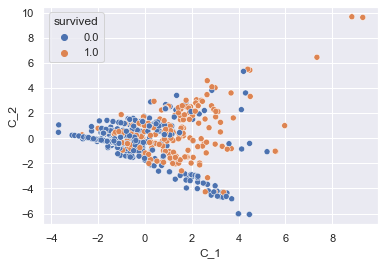

In [95]:
sns.scatterplot(x="C_1",y="C_2",hue="survived",data=svd_df)

# Supervised Algorithms

## 1.KNN

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [97]:
t=ts()

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("done...")
te(t)

Time started...
done...
Time taken: 0.004 seconds.
Total Time: 2.86 seconds.


In [98]:
acc_train = accuracy_score(y_train, knn.predict(X_train))*100
acc_test = accuracy_score(y_test, knn.predict(X_test))*100
print(acc_train)
print(acc_test)

86.37640449438202
82.12290502793296


In [99]:
acc_list = []
acc_list.append(['KNN', acc_train, acc_test])
acc_list

[['KNN', 86.37640449438202, 82.12290502793296]]

In [100]:
train_auc = roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
print(train_auc)
print(test_auc)

0.9305961745327418
0.8574002574002574


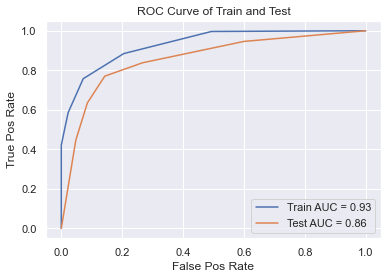

In [101]:
train_fpr, train_tpr, thresholds_train = roc_curve(y_train, knn.predict_proba(X_train)[:, 1], pos_label=1)
test_fpr, test_tpr, thresholds_test = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label=1)

plt.plot(train_fpr, train_tpr, label="Train AUC = "+str(round(auc(train_fpr, train_tpr), 2)))
plt.plot(test_fpr, test_tpr, label="Test AUC = "+str(round(auc(test_fpr, test_tpr), 2)))
plt.legend()
plt.xlabel("False Pos Rate")
plt.ylabel("True Pos Rate")
plt.title("ROC Curve of Train and Test")
plt.show()

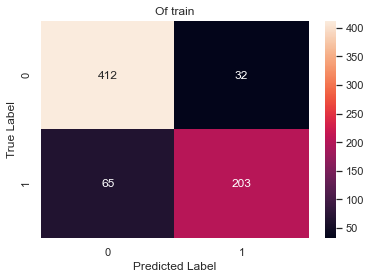

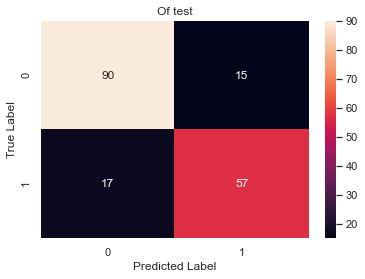

In [102]:
conf_matrix_train = confusion_matrix(y_train, knn.predict(X_train))
df_cm_train = pd.DataFrame(conf_matrix_train)
hm = sns.heatmap(df_cm_train, annot = True, fmt = "d")
plt.title("Of train")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

s()

conf_matrix_test = confusion_matrix(y_test, knn.predict(X_test))
df_cm_test = pd.DataFrame(conf_matrix_test)
hm = sns.heatmap(df_cm_test, annot = True, fmt = "d")
plt.title("Of test")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

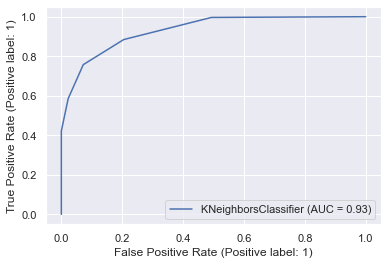

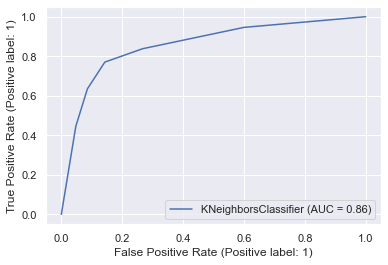

In [103]:
plot_roc_curve(knn, X_train, y_train)
plot_roc_curve(knn, X_test, y_test)  

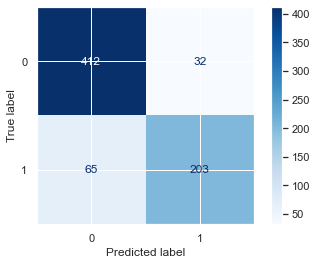

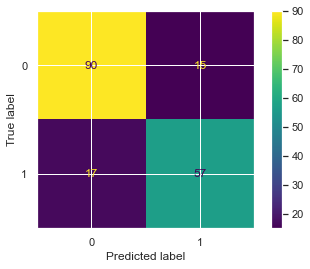

In [104]:
plot_confusion_matrix(knn, X_train, y_train, cmap=plt.cm.Blues)
plot_confusion_matrix(knn, X_test, y_test)

## 2.Naive Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
t=ts()

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('done...')

te(t)

Time started...
done...
Time taken: 0.003 seconds.
Total Time: 2.87 seconds.


In [107]:
acc_train = accuracy_score(y_train, gnb.predict(X_train))*100
acc_test = accuracy_score(y_test, gnb.predict(X_test))*100
print(acc_train)
print(acc_test)

75.42134831460675
75.41899441340783


In [108]:
acc_list.append(["Naive Bayes", acc_train, acc_test])
acc_list

[['KNN', 86.37640449438202, 82.12290502793296],
 ['Naive Bayes', 75.42134831460675, 75.41899441340783]]

## 3. Logistic Regression 

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
t=ts()

log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train,y_train)
print('done...')

te(t)

Time started...
done...
Time taken: 0.009 seconds.
Total Time: 2.88 seconds.


In [111]:
acc_train = accuracy_score(y_train, log_reg.predict(X_train))*100
acc_test = accuracy_score(y_test, log_reg.predict(X_test))*100
print(acc_train)
print(acc_test)

78.23033707865169
81.56424581005587


In [112]:
acc_list.append(['Logistic Regression', acc_train, acc_test])
acc_list

[['KNN', 86.37640449438202, 82.12290502793296],
 ['Naive Bayes', 75.42134831460675, 75.41899441340783],
 ['Logistic Regression', 78.23033707865169, 81.56424581005587]]

## 4.Linear Regression 

In [113]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

# this is classification problem, still just trying this. :\

In [114]:
t=ts()

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
print('done...')


te(t)

Time started...
done...
Time taken: 0.003 seconds.
Total Time: 2.88 seconds.


In [115]:
acc_train = mean_absolute_error(y_train, lin_reg.predict(X_train))*100
acc_test = mean_absolute_error(y_test, lin_reg.predict(X_test))*100
print(acc_train)
print(acc_test)

29.5344778539182
28.566038405343715


In [116]:
acc_list.append(['Linear Regression', acc_train, acc_test])
acc_list

[['KNN', 86.37640449438202, 82.12290502793296],
 ['Naive Bayes', 75.42134831460675, 75.41899441340783],
 ['Logistic Regression', 78.23033707865169, 81.56424581005587],
 ['Linear Regression', 29.5344778539182, 28.566038405343715]]

## 5.SVM 

In [117]:
from sklearn.svm import SVC

In [118]:
t=ts()

svc = SVC()
svc.fit(X_train, y_train)
print('done...')

te(t)

Time started...
done...
Time taken: 0.016 seconds.
Total Time: 2.9 seconds.


In [119]:
acc_train = accuracy_score(y_train, svc.predict(X_train))*100
acc_test = accuracy_score(y_test, svc.predict(X_test))*100
print(acc_train)
print(acc_test)

84.26966292134831
81.00558659217877


In [120]:
acc_list.append(['SVM', acc_train, acc_test])
acc_list

[['KNN', 86.37640449438202, 82.12290502793296],
 ['Naive Bayes', 75.42134831460675, 75.41899441340783],
 ['Logistic Regression', 78.23033707865169, 81.56424581005587],
 ['Linear Regression', 29.5344778539182, 28.566038405343715],
 ['SVM', 84.26966292134831, 81.00558659217877]]

## 6.Decision Tree 

In [121]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree

In [122]:
t=ts()

dtc = DecisionTreeClassifier(class_weight='balanced')
dtc.fit(X_train, y_train)
print('done...')

te(t)

Time started...
done...
Time taken: 0.004 seconds.
Total Time: 2.9 seconds.


In [123]:
acc_train = accuracy_score(y_train, dtc.predict(X_train))*100
acc_test = accuracy_score(y_test, dtc.predict(X_test))*100
print(acc_train)
print(acc_test)

98.03370786516854
77.09497206703911


In [124]:
acc_list.append(['Decision Tree', acc_train, acc_test])
acc_list

[['KNN', 86.37640449438202, 82.12290502793296],
 ['Naive Bayes', 75.42134831460675, 75.41899441340783],
 ['Logistic Regression', 78.23033707865169, 81.56424581005587],
 ['Linear Regression', 29.5344778539182, 28.566038405343715],
 ['SVM', 84.26966292134831, 81.00558659217877],
 ['Decision Tree', 98.03370786516854, 77.09497206703911]]

In [125]:
dtc.feature_importances_

array([0.05972593, 0.30676969, 0.13429747, 0.03031312, 0.01040877,
       0.12704714, 0.00749423, 0.15835506, 0.15391767, 0.00766793,
       0.00301337, 0.0009896 ])

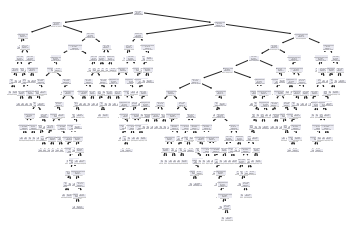

In [186]:
from sklearn.tree import plot_tree

plot_tree(dtc, feature_names = feat_names)
plt.show()

## 7.Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
t=ts()

rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)
print('done...')

te(t)

Time started...
done...
Time taken: 0.1446 seconds.
Total Time: 3.04 seconds.


In [129]:
acc_train = accuracy_score(y_train, rfc.predict(X_train))*100
acc_test = accuracy_score(y_test, rfc.predict(X_test))*100
print(acc_train)
print(acc_test)

98.03370786516854
83.24022346368714


In [130]:
acc_list.append(['Random Forest', acc_train, acc_test])
acc_list

[['KNN', 86.37640449438202, 82.12290502793296],
 ['Naive Bayes', 75.42134831460675, 75.41899441340783],
 ['Logistic Regression', 78.23033707865169, 81.56424581005587],
 ['Linear Regression', 29.5344778539182, 28.566038405343715],
 ['SVM', 84.26966292134831, 81.00558659217877],
 ['Decision Tree', 98.03370786516854, 77.09497206703911],
 ['Random Forest', 98.03370786516854, 83.24022346368714]]

## 8.AdaBoost 

In [131]:
from sklearn.ensemble import AdaBoostClassifier

In [132]:
t=ts()

abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
print('done...')

te(t)

Time started...
done...
Time taken: 0.0708 seconds.
Total Time: 3.12 seconds.


In [133]:
acc_train = accuracy_score(y_train, abc.predict(X_train))*100
acc_test = accuracy_score(y_test, abc.predict(X_test))*100
print(acc_train)
print(acc_test)

84.69101123595506
80.44692737430168


In [134]:
acc_list.append(['AdaBoost', acc_train, acc_test])
acc_list

[['KNN', 86.37640449438202, 82.12290502793296],
 ['Naive Bayes', 75.42134831460675, 75.41899441340783],
 ['Logistic Regression', 78.23033707865169, 81.56424581005587],
 ['Linear Regression', 29.5344778539182, 28.566038405343715],
 ['SVM', 84.26966292134831, 81.00558659217877],
 ['Decision Tree', 98.03370786516854, 77.09497206703911],
 ['Random Forest', 98.03370786516854, 83.24022346368714],
 ['AdaBoost', 84.69101123595506, 80.44692737430168]]

## 9.XgBoost

In [135]:
from xgboost import XGBClassifier

In [136]:
t=ts()

xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
print('done...')

te(t)

Time started...
[17:16:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
done...
Time taken: 0.1217 seconds.
Total Time: 3.24 seconds.


S:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [137]:
acc_train = accuracy_score(y_train, xgbc.predict(X_train))*100
acc_test = accuracy_score(y_test, xgbc.predict(X_test))*100
print(acc_train)
print(acc_test)

97.47191011235955
81.56424581005587


S:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
S:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [138]:
acc_list.append(['XgBoost', acc_train, acc_test])
acc_list

[['KNN', 86.37640449438202, 82.12290502793296],
 ['Naive Bayes', 75.42134831460675, 75.41899441340783],
 ['Logistic Regression', 78.23033707865169, 81.56424581005587],
 ['Linear Regression', 29.5344778539182, 28.566038405343715],
 ['SVM', 84.26966292134831, 81.00558659217877],
 ['Decision Tree', 98.03370786516854, 77.09497206703911],
 ['Random Forest', 98.03370786516854, 83.24022346368714],
 ['AdaBoost', 84.69101123595506, 80.44692737430168],
 ['XgBoost', 97.47191011235955, 81.56424581005587]]

In [177]:
acc_list_df = pd.DataFrame()

In [178]:
name = []
for i in range(len(acc_list)):
    name.append(acc_list[i][0])

name1 = []
for i in range(len(acc_list)):
    name1.append(acc_list[i][1])

name2 = []
for i in range(len(acc_list)):
    name2.append(acc_list[i][2])

In [179]:
acc_list_df['name'] = name
acc_list_df['train_acc'] = name1
acc_list_df['test_acc'] = name2

In [180]:
acc_list_df

,name,train_acc,test_acc
0,KNN,86.376404,82.122905
1,Naive Bayes,75.421348,75.418994
2,Logistic Regression,78.230337,81.564246
3,Linear Regression,29.534478,28.566038
4,SVM,84.269663,81.005587
5,Decision Tree,98.033708,77.094972
6,Random Forest,98.033708,83.240223
7,AdaBoost,84.691011,80.446927
8,XgBoost,97.471910,81.564246


## Deep learning - MLP

In [139]:
from sklearn.neural_network import MLPClassifier
# trying sklearn NN, just for fun :] 

In [182]:
t=ts()

mlp = MLPClassifier()
mlp.fit(X_train,y_train)
print('done...')

te(t)

Time started...
done...
Time taken: 0.5321 seconds.
Total Time: 3.77 seconds.


S:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [183]:
acc_train = accuracy_score(y_train, mlp.predict(X_train))*100
acc_test = accuracy_score(y_test, mlp.predict(X_test))*100
print(acc_train)
print(acc_test)

85.53370786516854
81.56424581005587


# Evaluation 

In [184]:
acc_list_df

,name,train_acc,test_acc
0,KNN,86.376404,82.122905
1,Naive Bayes,75.421348,75.418994
2,Logistic Regression,78.230337,81.564246
3,Linear Regression,29.534478,28.566038
4,SVM,84.269663,81.005587
5,Decision Tree,98.033708,77.094972
6,Random Forest,98.033708,83.240223
7,AdaBoost,84.691011,80.446927
8,XgBoost,97.471910,81.564246


In [185]:
# from above results Random Forest looks convincing but it has overfitted, let do hyperparameter tuning.

In [195]:
from sklearn.model_selection import GridSearchCV

In [200]:
t=ts()

n_estimators = np.array([10,30,50,75,100,120,150,200,300,500]) #50
min_samples_leaf = np.array([1, 3, 5, 10, 20]) #5
max_depth = np.array([1,5,10, 15,18]) #15
max_samples = np.array([0.1, 0.3, 0.5, 0.7, 0.9]) #0.9

params_dict = [{'max_depth': max_depth,'min_samples_leaf': min_samples_leaf,'n_estimators': n_estimators,
               'max_samples': max_samples}]

rfc = RandomForestClassifier(class_weight='balanced',oob_score=True, random_state= 42, bootstrap=True, 
                             n_jobs=-1)
rfc.fit(X_train, y_train)

grid = GridSearchCV(estimator=rfc, 
                        param_grid=params_dict, 
                        scoring='roc_auc', n_jobs=4, cv=5,
                        return_train_score=True)

grid_result = grid.fit(X_train, y_train)
    
print("Optimal Parameters : ", grid_result.best_estimator_.get_params())

print('done...')

te(t)

Time started...
Optimal Parameters :  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': 0.9, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': -1, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}
done...
Time taken: 684.1972 seconds.
Total Time: 733.75 seconds.


In [201]:
grid_result.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': 0.9,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [210]:
t=ts()

rfc1 = RandomForestClassifier(class_weight='balanced', oob_score=True, random_state= 42, bootstrap=True, 
                             max_depth=15,  min_samples_leaf= 5, min_samples_split= 2,
                            n_estimators= 50)
rfc1.fit(X_train, y_train)
print('done...')

te(t)

Time started...
done...
Time taken: 0.0758 seconds.
Total Time: 733.97 seconds.


In [211]:
acc_train = accuracy_score(y_train, rfc1.predict(X_train))*100
acc_test = accuracy_score(y_test, rfc1.predict(X_test))*100
print('acc_train = ',acc_train)
print('acc_test = ',acc_test)

acc_train =  87.64044943820225
acc_test =  83.79888268156425


###  Creating submission file

In [219]:
y_pred_competition = rfc1.predict(df_test)
y_pred_competition.shape

(418,)

In [220]:
y_pred_competition

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [224]:
result = pd.DataFrame()

In [225]:
result['PassengerId'] = df_test0['PassengerId']

In [227]:
result['Survived'] = y_pred_competition

In [228]:
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [231]:
result.to_csv('Results.csv',index=False)

In [235]:
%ls

 Volume in drive S is New Volume
 Volume Serial Number is 9ADF-0957

 Directory of S:\extract\appliedai\datasets\titanic

22-08-2021  19:39    <DIR>          .
22-08-2021  19:39    <DIR>          ..
21-08-2021  20:37    <DIR>          .ipynb_checkpoints
11-12-2019  02:17             3,258 gender_submission.csv
22-08-2021  19:37             3,258 Results.csv
11-12-2019  02:17            28,629 test.csv
22-08-2021  19:39         1,069,090 titanic.ipynb
11-12-2019  02:17            61,194 train.csv
               5 File(s)      1,165,429 bytes
               3 Dir(s)  70,105,010,176 bytes free
